# EDA and PCA of Microbiome Data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

In [7]:
fullData = pd.read_csv("mergedDataFull.csv")
fullDataFiltered = fullData.iloc[:,1:295]
fullDataFiltered['disease_type'] = fullData['disease_type']
fullDataFiltered.index = fullData['sampleid']

In [8]:
#coding cancers into numerals
labels, uniques = pd.factorize(fullDataFiltered['disease_type'])
category_mapping = dict(enumerate(uniques))
print(category_mapping)

fullDataFiltered['disease_type'] = pd.factorize(fullDataFiltered['disease_type'])[0]

{0: 'Ovarian Serous Cystadenocarcinoma', 1: 'Stomach Adenocarcinoma', 2: 'Glioblastoma Multiforme', 3: 'Skin Cutaneous Melanoma', 4: 'Thymoma', 5: 'Colon Adenocarcinoma', 6: 'Kidney Renal Clear Cell Carcinoma', 7: 'Thyroid Carcinoma', 8: 'Head and Neck Squamous Cell Carcinoma', 9: 'Lung Squamous Cell Carcinoma', 10: 'Kidney Renal Papillary Cell Carcinoma', 11: 'Breast Invasive Carcinoma', 12: 'Prostate Adenocarcinoma', 13: 'Uterine Corpus Endometrial Carcinoma', 14: 'Lung Adenocarcinoma', 15: 'Bladder Urothelial Carcinoma', 16: 'Brain Lower Grade Glioma', 17: 'Uveal Melanoma', 18: 'Adrenocortical Carcinoma', 19: 'Esophageal Carcinoma', 20: 'Rectum Adenocarcinoma', 21: 'Liver Hepatocellular Carcinoma', 22: 'Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma', 23: 'Cholangiocarcinoma', 24: 'Kidney Chromophobe', 25: 'Acute Myeloid Leukemia', 26: 'Sarcoma', 27: 'Pheochromocytoma and Paraganglioma', 28: 'Pancreatic Adenocarcinoma', 29: 'Uterine Carcinosarcoma', 30: 'Mesothelio

In [9]:
logNormalized = np.log((fullDataFiltered.iloc[:,0:294].div(fullDataFiltered.iloc[:,0:294].sum(axis=1), axis=0)) + 1e-8)
logNormalized['disease_type'] = fullDataFiltered['disease_type']
logNormalized.head()

,Pneumocystis,Candida,Saccharomyces,Fusarium,Cyphellophora,Penicillium,Aspergillus,Malassezia,Jonquetella,Cloacibacillus,...,Tunavirus,Rhadinovirus,Elvirus,Chivirus,Jiaodavirus,Webervirus,Vectrevirus,Alphapolyomavirus,Fromanvirus,disease_type
sampleid,,,,,,,,,,,,,,,,,,,,,
13722.58cfa82ee4b0c9d6adf6afe3,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-7.073258,-6.380117,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,0
13722.58cfa82ee4b0c9d6adf6aeb0,-18.420681,-7.416963,-18.420681,-6.030681,-18.420681,-18.420681,-7.416963,-4.777921,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,1
13722.58cfa82ee4b0c9d6adf6b1e4,-18.420681,-7.248846,-10.021223,-18.420681,-18.420681,-18.420681,-18.420681,-5.488846,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,2
13722.58cfa830e4b0c9d6adf6bd98,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,3
13767.58cfa83be4b0c9d6adf72130,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,4


In [10]:
logNormalized.to_csv("logNormalisedFullData.csv")

In [11]:
logTransPca = PCA()

fullLogpcaResults = logTransPca.fit_transform(logNormalized.iloc[: , 0:294])

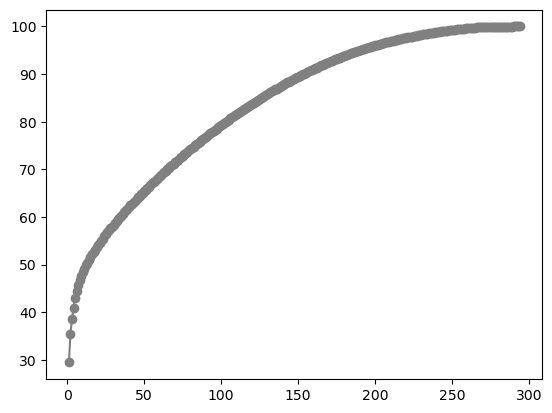

In [12]:
explained_variances = logTransPca.explained_variance_ratio_.cumsum()

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variances) + 1),
         explained_variances*100, # convert explained variance in percentage
         marker='o',
         color = 'grey')

In [13]:
print(f"{logTransPca.explained_variance_ratio_.sum()*100}%")

99.99999999999999%


In [16]:
colors = plt.cm.get_cmap('tab20', 33)

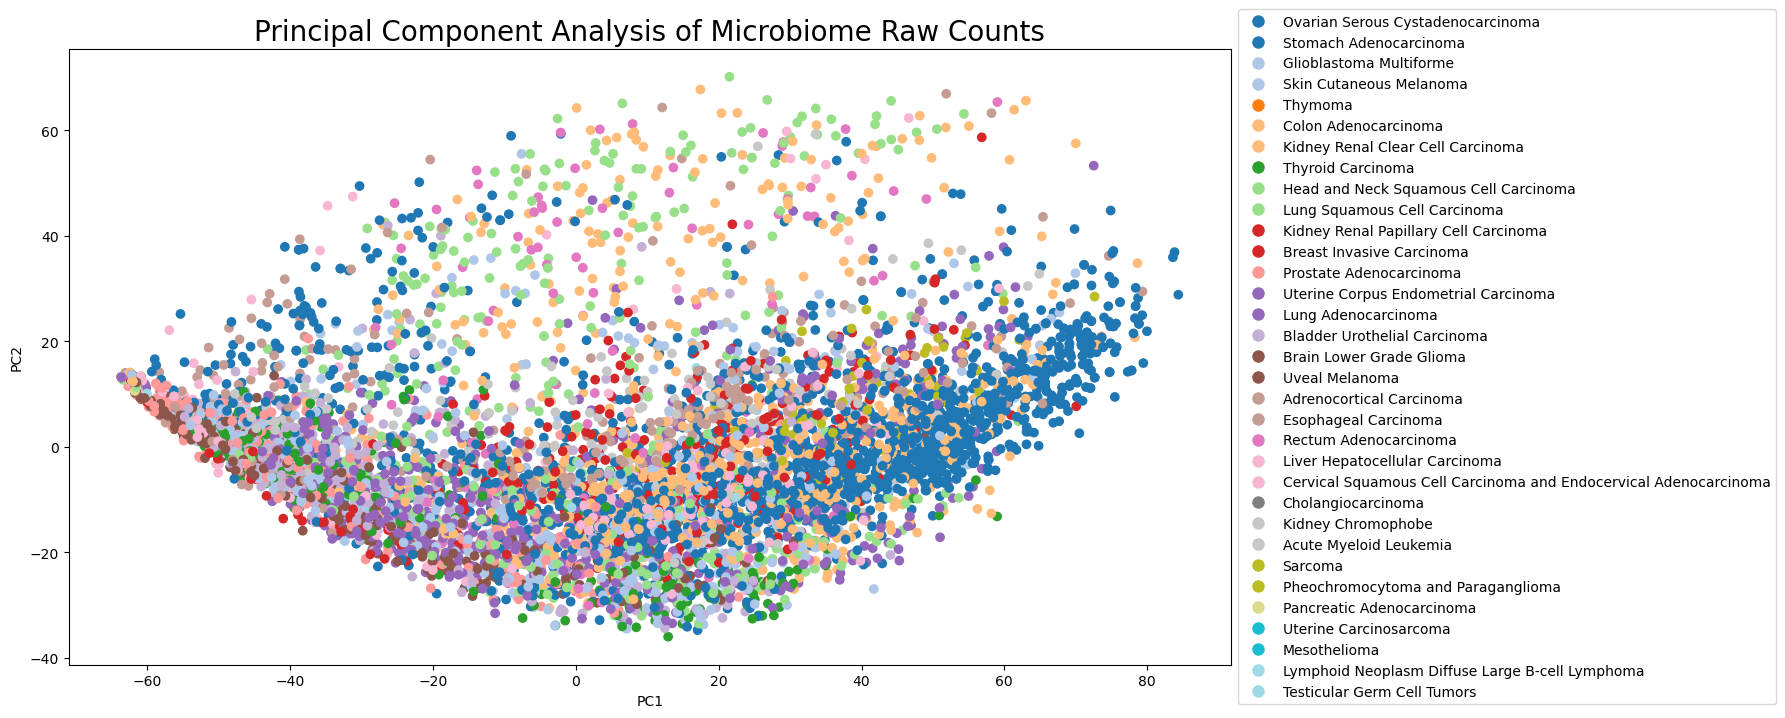

In [17]:
plt.figure(figsize = (15,8))
plt.title("Principal Component Analysis of Microbiome Raw Counts",fontsize=20)

plot = plt.scatter(fullLogpcaResults[:,0], 
                   fullLogpcaResults[:,1], 
                   c = logNormalized['disease_type'],
                   cmap = colors)

legend_handles = [Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor=colors(i), markersize=10) 
                  for i in range(33)]
plt.legend(handles=legend_handles, 
           labels=list(category_mapping.values()), 
           loc="center left", 
           bbox_to_anchor=(1, 0.5))

plt.savefig("fullDataPCA.png", bbox_inches ="tight")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [21]:
#importing preprocessed data
brca = pd.read_csv("brca_vs_normal.csv")

In [20]:
colors = ['cornflowerblue', 'firebrick']

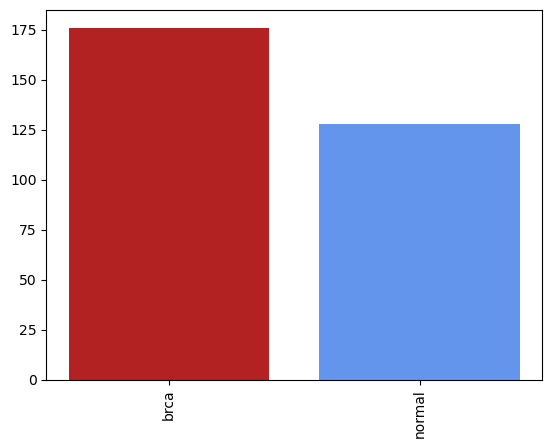

In [22]:
codedSampleCounts = brca['sample_type'].value_counts()
codedSampleCounts
plt.bar(codedSampleCounts.index, 
        codedSampleCounts.values, 
        color = ['firebrick', 'cornflowerblue'])

plt.xticks(rotation=90)
plt.show()

In [23]:
countsData_T = brca.iloc[ : , 0:294].transpose()

In [24]:
brcaCounts = brca.columns[:-1]  # All columns except the last one
sampleType = brca.columns[-2]  # The last column ('sample_type')
print(sampleType)
# Sum each microbial taxa by sample type
groupedData = brca.groupby(sampleType)[brcaCounts].sum().T  #Transpose for plotting

# Plotting the stacked bar chart
#fig, ax = plt.subplots(figsize=(12, 8))

# Stacked bar plot for each microbial taxa
#groupedData.plot(kind='bar', 
#                  stacked=True, 
#                  ax=ax,
#                  width=0.8,
#                  edgecolor='white')

#ax.set_title('Distribution of Microbial Taxa across BRCA and Normal Categories')
#ax.set_ylabel('Abundance')
#ax.set_xlabel('Microbial Taxa')
#ax.legend(title='Sample Type')


#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()
groupedData.head()

sample_type


sample_type,brca,normal
Pneumocystis,-4017.380285,-2921.410029
Candida,-3646.638726,-2541.221272
Saccharomyces,-3056.590846,-2223.720238
Fusarium,-3744.912960,-2630.871988
Cyphellophora,-3988.326707,-2917.432451


In [26]:
#getting the top 100 most abundant taxa
top100 = groupedData.sum(axis=1).nlargest(100).index
groupedDataTop100 = groupedData.loc[top100]
groupedDataTop100 = -groupedDataTop100

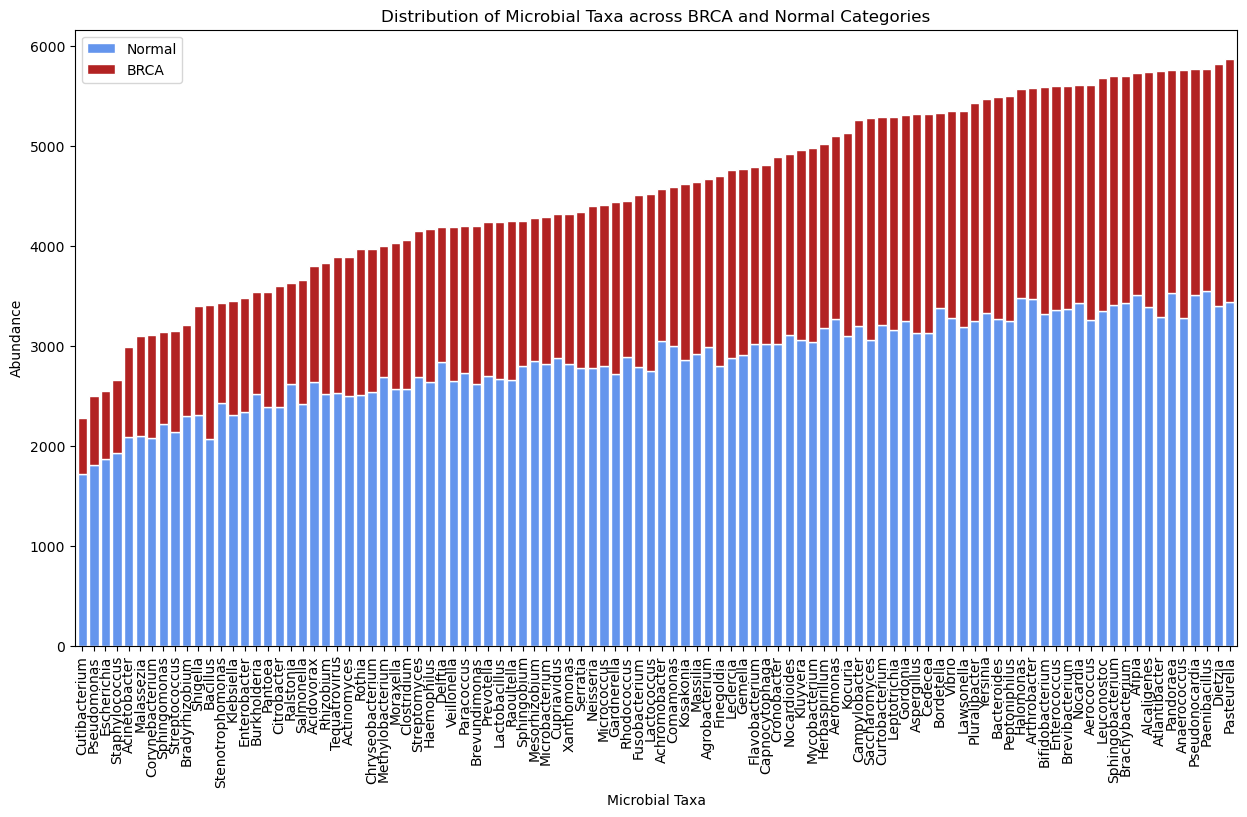

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

groupedDataTop100.plot(kind='bar', 
                       stacked=True, 
                       width=0.8,
                       edgecolor='white',
                       cmap = plt.matplotlib.colors.ListedColormap(colors),
                       ax=ax)

plt.title('Distribution of Microbial Taxa across BRCA and Normal Categories')
plt.ylabel('Abundance')
plt.xlabel('Microbial Taxa')
plt.legend(title='Sample Type')
plt.legend(labels=['Normal', 'BRCA'])


plt.xticks(rotation=90)
plt.savefig("microbialTaxaAbundance.png")
plt.show()

Plotted the negative of normalized data not the absolute value, plot raw reads instead!

In [28]:
#creating PCA object
pca = PCA()

#fitting data
pcaResults = pca.fit_transform(brca.iloc[: , 0:294])

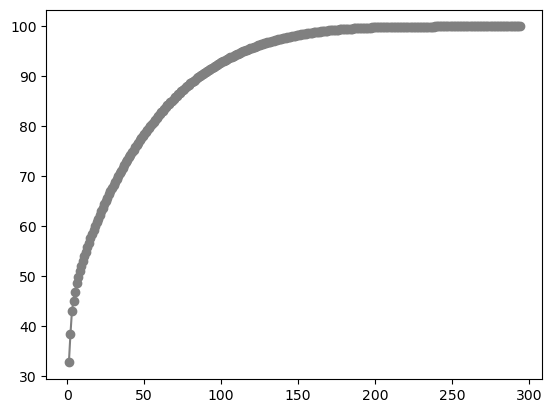

In [29]:
explained_variances = pca.explained_variance_ratio_.cumsum()

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variances) + 1),
         explained_variances*100, # convert explained variance in percentage
         marker='o',
         color='grey')
plt.savefig("PCAExplainedVar_BRCAversusNormal.png")

In [30]:
#total explained variance
print(f"{pca.explained_variance_ratio_.sum()*100}%")

99.99999999999999%


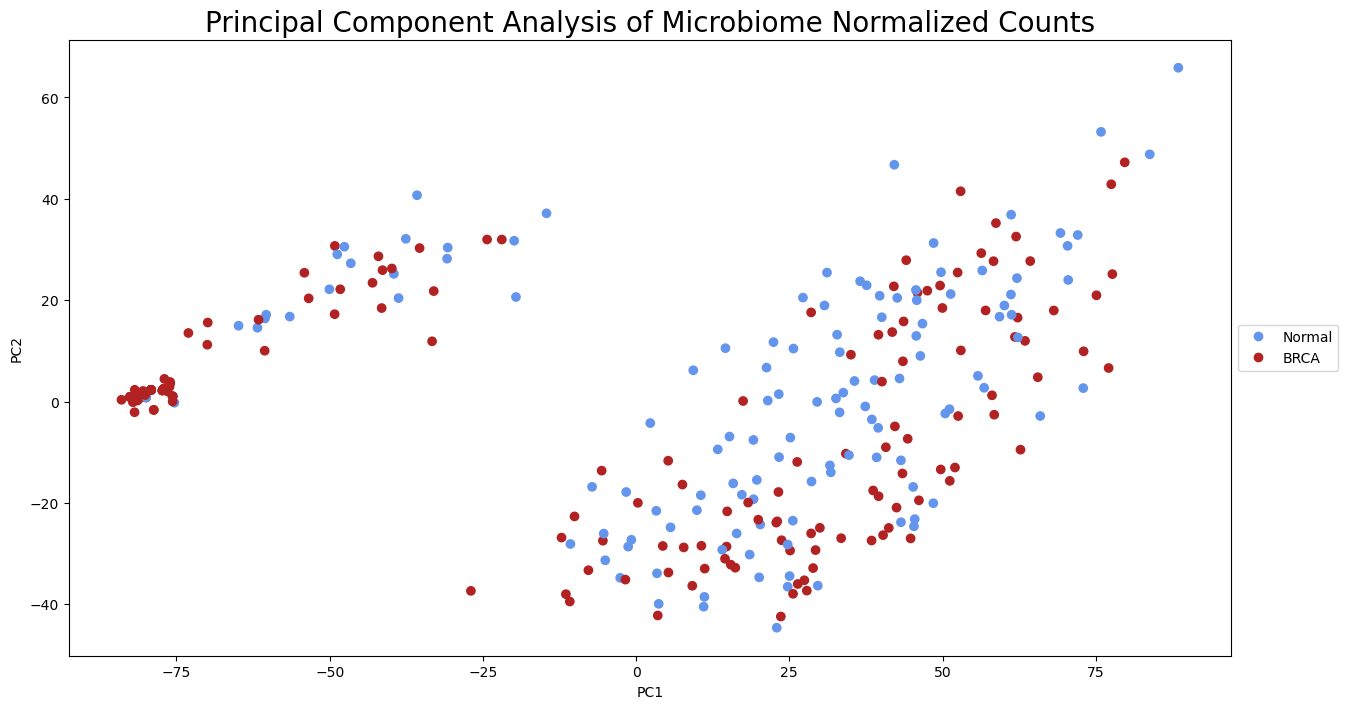

In [31]:
brca['sample_type'] = brca['sample_type'].replace('normal', 0)
brca['sample_type'] = brca['sample_type'].replace('brca', 1)

plt.figure(figsize = (15,8))
plt.title("Principal Component Analysis of Microbiome Normalized Counts",fontsize=20)

plot = plt.scatter(pcaResults[:,0], 
            pcaResults[:,1], 
            c = brca['sample_type'],
            cmap = mcolors.ListedColormap(colors))

plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend(labels=['Normal', 'BRCA'])
plt.legend(handles=plot.legend_elements()[0], 
           labels=['Normal', 'BRCA'], 
           loc="center left", 
           bbox_to_anchor=(1, 0.5))
plt.savefig("PCABySampleType.png")
plt.show()

In [32]:
fullDataWithCenter = fullData.iloc[:,1:295]
fullDataWithCenter['center'] = fullData['data_submitting_center_label']
fullDataWithCenter['sample_type'] = fullData['sample_type']
fullDataWithCenter['disease_type'] = fullData['disease_type']

In [33]:
#normalizing
fullDataWithCenter.iloc[: , 0:294] = fullDataWithCenter.iloc[: , 0:294].replace(0, 1e-10)
fullDataWithCenter_logNormalized = np.log((fullDataWithCenter.iloc[: , 0:294].div(fullDataWithCenter.iloc[: , 0:294].sum(axis=1), axis=0)) + 1e-10)
fullDataWithCenter_logNormalized['center'] = fullDataWithCenter['center']
fullDataWithCenter_logNormalized['sample_type'] = fullDataWithCenter['sample_type']
fullDataWithCenter_logNormalized['disease_type'] = fullDataWithCenter['disease_type']
fullDataWithCenter_logNormalized.head()

,Pneumocystis,Candida,Saccharomyces,Fusarium,Cyphellophora,Penicillium,Aspergillus,Malassezia,Jonquetella,Cloacibacillus,...,Elvirus,Chivirus,Jiaodavirus,Webervirus,Vectrevirus,Alphapolyomavirus,Fromanvirus,center,sample_type,disease_type
0,-23.025004,-23.025004,-23.025004,-23.025004,-23.025004,-23.025004,-7.073270,-6.380122,-23.025004,-23.025004,...,-23.025004,-23.025004,-23.025004,-23.025004,-23.025004,-23.025004,-23.025004,Baylor College of Medicine,Blood Derived Normal,Ovarian Serous Cystadenocarcinoma
1,-23.025250,-7.416979,-23.025250,-6.030685,-23.025250,-23.025250,-7.416979,-4.777922,-23.025250,-23.025250,...,-23.025250,-23.025250,-23.025250,-23.025250,-23.025250,-23.025250,-23.025250,Broad Institute of MIT and Harvard,Blood Derived Normal,Stomach Adenocarcinoma
2,-23.025806,-7.248859,-10.021446,-23.025806,-23.025806,-23.025806,-23.025806,-5.488849,-23.025806,-23.025806,...,-23.025806,-23.025806,-23.025806,-23.025806,-23.025806,-23.025806,-23.025806,Washington University School of Medicine,Blood Derived Normal,Glioblastoma Multiforme
3,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,...,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,-23.020054,Harvard Medical School,Blood Derived Normal,Skin Cutaneous Melanoma
4,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,...,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,-22.332704,University of North Carolina,Primary Tumor,Thymoma


In [34]:
fullDataWithCenter_logNormalized = fullDataWithCenter_logNormalized[fullDataWithCenter_logNormalized['disease_type'] == "Breast Invasive Carcinoma"]

In [35]:
fullDataWithCenter_logNormalized['sample_type'] = fullDataWithCenter_logNormalized['sample_type'].replace('Primary Tumor', 'brca')
fullDataWithCenter_logNormalized['sample_type'] = fullDataWithCenter_logNormalized['sample_type'].replace('Blood Derived Normal', 'normal')
fullDataWithCenter_logNormalized['sample_type'] = fullDataWithCenter_logNormalized['sample_type'].replace('Solid Tissue Normal', 'normal')
fullDataWithCenter_logNormalized['sample_type'] = fullDataWithCenter_logNormalized['sample_type'].replace('Metastatic', 'brca')
print(fullDataWithCenter_logNormalized[['sample_type']].describe())

       sample_type
count          304
unique           2
top           brca
freq           176


In [36]:
#creating PCA object
pcaCenter = PCA()

#fitting data
pcaCenterResults = pca.fit_transform(fullDataWithCenter_logNormalized.iloc[: , 0:294])

In [37]:
labels, uniques = pd.factorize(fullDataWithCenter_logNormalized['center'])
category_mapping = dict(enumerate(uniques))
print(category_mapping)

fullDataWithCenter_logNormalized['center'] = pd.factorize(fullDataWithCenter_logNormalized['center'])[0]
#fullDataFiltered['disease_type']

{0: 'University of North Carolina', 1: 'Washington University School of Medicine', 2: 'Harvard Medical School', 3: 'MD Anderson - Institute for Applied Cancer Science'}


In [38]:
fullDataWithCenter_logNormalized['center'].value_counts()

1    199
0     65
2     38
3      2
Name: center, dtype: int64

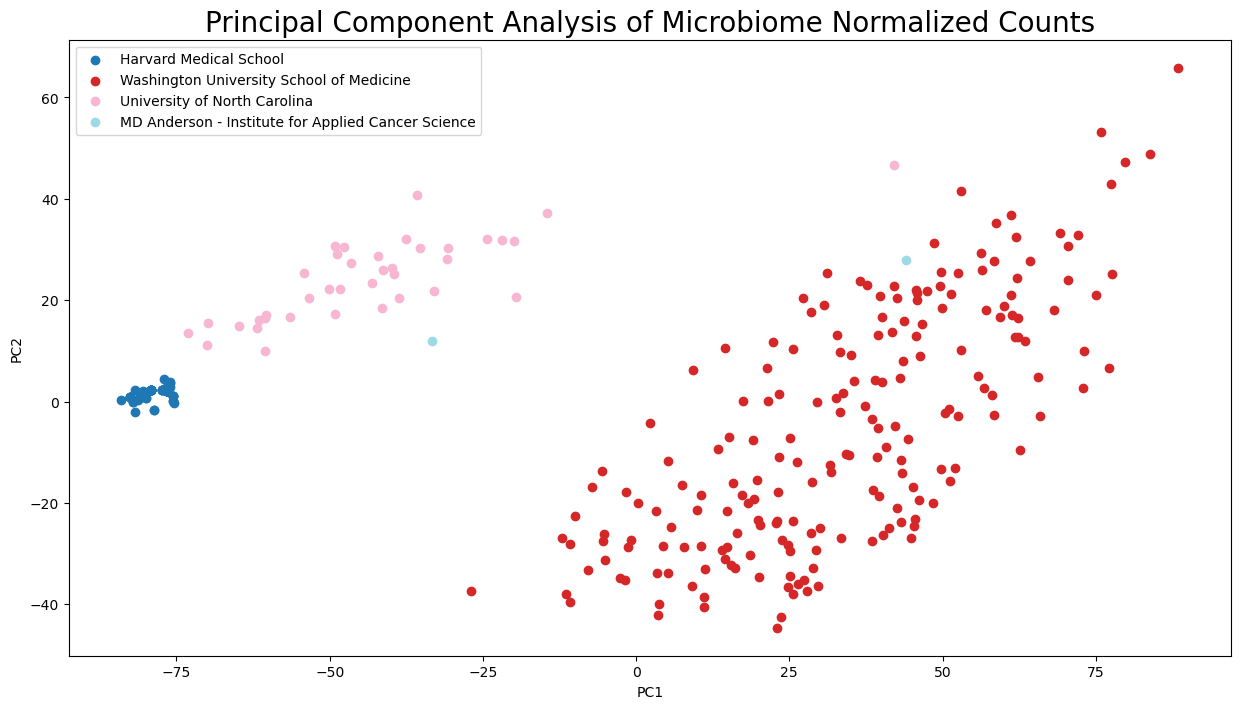

In [39]:
import matplotlib.patches as mpatches

plt.figure(figsize = (15,8))

plt.title("Principal Component Analysis of Microbiome Normalized Counts", 
          fontsize=20)

cmap = plt.cm.get_cmap('tab20', 4)
colors = [cmap(i) for i in range(4)]

legend_labels = ['Harvard Medical School', 'Washington University School of Medicine', 
                 'University of North Carolina', 'MD Anderson - Institute for Applied Cancer Science']

# Plot each category with its own color
for i, label in enumerate(legend_labels):
    plt.scatter(pcaCenterResults[fullDataWithCenter_logNormalized['center'] == i, 0], 
                pcaCenterResults[fullDataWithCenter_logNormalized['center'] == i, 1], 
                c=colors[i], 
                label=label)
    
legend_patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# Add the custom legend with patches
plt.legend(handles=legend_patches,
           loc="center left",
           bbox_to_anchor=(1, 0.5))

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()
plt.savefig("PCAByCenter.png")
plt.show()


In [40]:
brca_vs_others = pd.read_csv("brca_vs_others.csv")
brca_vs_others.set_index("sampleid", inplace=True)

sampleid
13722.58cfa82ee4b0c9d6adf6afe3    Other
13722.58cfa82ee4b0c9d6adf6aeb0    Other
13722.58cfa82ee4b0c9d6adf6b1e4    Other
13722.58cfa830e4b0c9d6adf6bd98    Other
13767.58cfa83be4b0c9d6adf72130    Other
                                  ...  
13767.58cfa834e4b0c9d6adf6e800    Other
13722.58cfa831e4b0c9d6adf6c422    Other
13722.58cfa82ee4b0c9d6adf6a916    Other
13767.58cfa835e4b0c9d6adf6ebba    Other
13722.58cfa831e4b0c9d6adf6c688    Other
Name: disease_type, Length: 7827, dtype: object

In [41]:
#creating PCA object
pcaBrcaVsOthers = PCA()

#fitting data
pcaBrcaVsOthersResults = pcaBrcaVsOthers.fit_transform(brca_vs_others.iloc[: , 0:294])

In [42]:
labels, uniques = pd.factorize(brca_vs_others['disease_type'])
category_mapping = dict(enumerate(uniques))
print(category_mapping)

brca_vs_others['disease_type'] = pd.factorize(brca_vs_others['disease_type'])[0]
#fullDataFiltered['disease_type']

{0: 'Other', 1: 'BRCA'}


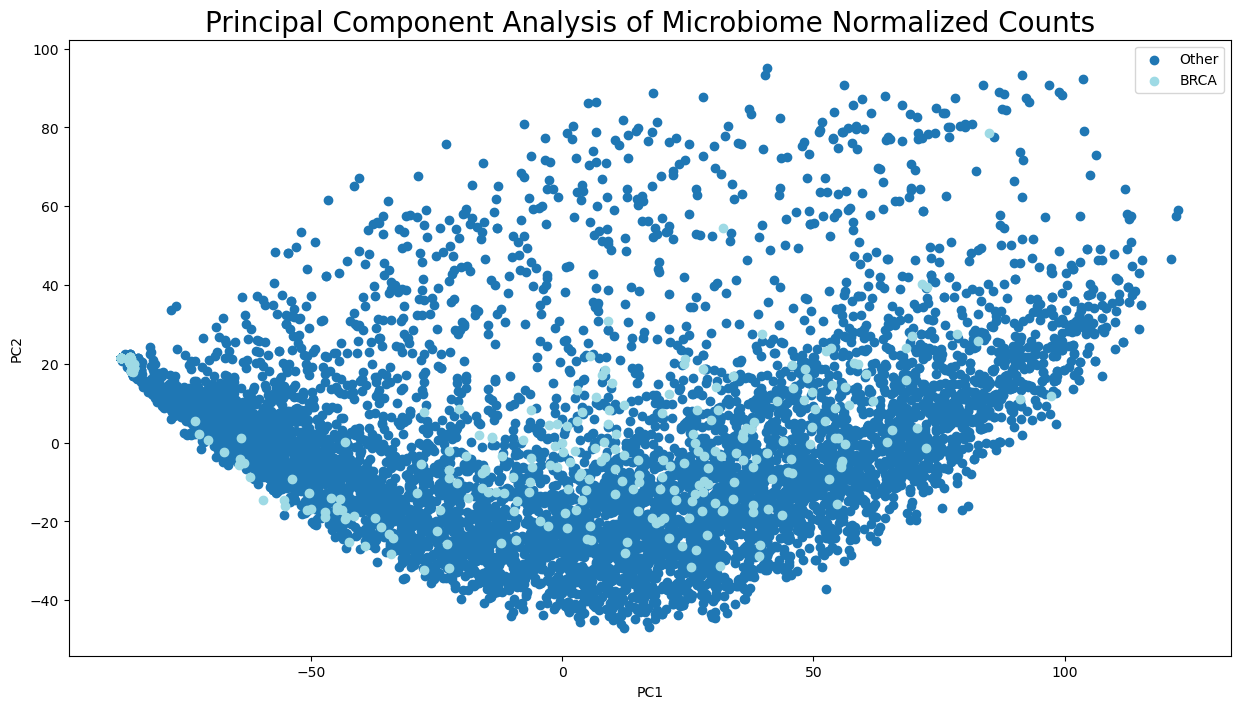

In [43]:
import matplotlib.patches as mpatches

plt.figure(figsize = (15,8))

plt.title("Principal Component Analysis of Microbiome Normalized Counts", 
          fontsize=20)

cmap = plt.cm.get_cmap('tab20', 2)
colors = [cmap(i) for i in range(2)]

legend_labels = ['Other', 'BRCA']

# Plot each category with its own color
for i, label in enumerate(legend_labels):
    plt.scatter(pcaBrcaVsOthersResults[brca_vs_others['disease_type'] == i, 0], 
                pcaBrcaVsOthersResults[brca_vs_others['disease_type'] == i, 1], 
                c=colors[i], label=label)
    
legend_patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]

# Add the custom legend with patches
plt.legend(handles=legend_patches,
           loc="center left")

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()
plt.savefig("PCA_BRCAvsOthers.png")
plt.show()
